In [1]:
""" !apt update
!apt -y install ffmpeg """
# I have 'pacman' package manager
from os import system
system("ffmpeg -version")

ffmpeg version n6.0 Copyright (c) 2000-2023 the FFmpeg developers
built with gcc 12.2.1 (GCC) 20230201
configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libjxl --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-lib

0

In [2]:
!wget -c https://files.deeppavlov.ai/field-matters/releases/demo/asr_data.csv
!wget -c https://files.deeppavlov.ai/field-matters/releases/demo/sound.zip
!unzip -n sound.zip

--2023-05-13 00:28:27--  https://files.deeppavlov.ai/field-matters/releases/demo/asr_data.csv
Resolving files.deeppavlov.ai (files.deeppavlov.ai)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘files.deeppavlov.ai’
--2023-05-13 00:28:28--  https://files.deeppavlov.ai/field-matters/releases/demo/sound.zip
Resolving files.deeppavlov.ai (files.deeppavlov.ai)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘files.deeppavlov.ai’
Archive:  sound.zip
audio_to_release/ckt/Let’s go wash to Egvekinot-0-3.mp4:  mismatching "local" filename (audio_to_release/ckt/LetтАЩs go wash to Egvekinot-0-3.mp4),
         continuing with "central" filename version
audio_to_release/ckt/Let’s go wash to Egvekinot-1-1.mp4:  mismatching "local" filename (audio_to_release/ckt/LetтАЩs go wash to Egvekinot-1-1.mp4),
         continuing with "central" filename version
audio_to_release/ckt/Let’s go wash to Egvekinot-1-2.mp4:  mismatching "loca

In [3]:
import pandas as pd
import os
import re
from tqdm.auto import tqdm
tqdm.pandas()

In [4]:
df = pd.read_csv('asr_data.csv') #your dataset here

In [5]:
df["fpath"] = './audio_to_release/' + df["lang"].astype(str) + "/" + df["source"].astype(str)
df

,start,end,transcription,source,lang,fpath
0,4.260,7.113,"«Myaryosiw tina (Myaryosiw ti),",es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
1,7.116,9.642,sawa nyeǣǣy (săwă nye).,es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
2,16.638,19.785,"Pada ni yutʃitʹq (Pida ni yusidaq),",es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
3,19.787,22.974,pirye yesyada tănya (pirye yesyada tănya).,es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
4,94.893,97.867,"Săwawna macraaa (săwawna măncara),",es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
...,...,...,...,...,...,...
3207,28.476,29.481,gunən.,2011_Potapovo_Bogdanova_Tamara_Andreevna_FM2-2...,evn,./audio_to_release/evn/2011_Potapovo_Bogdanova...
3208,29.902,33.549,ēlā əto ēlā bəjə odantə̄.,2011_Potapovo_Bogdanova_Tamara_Andreevna_FM2-2...,evn,./audio_to_release/evn/2011_Potapovo_Bogdanova...
3209,34.548,38.193,a əto bəjəl gunďərəØ.,2011_Potapovo_Bogdanova_Tamara_Andreevna_FM2-2...,evn,./audio_to_release/evn/2011_Potapovo_Bogdanova...
3210,39.221,40.906,ŋinakin əmərən.,2011_Potapovo_Bogdanova_Tamara_Andreevna_FM2-2...,evn,./audio_to_release/evn/2011_Potapovo_Bogdanova...


In [6]:
#adding paths to file to dataset
df["fpath"] = './audio_to_release/' + df["lang"].astype(str) + "/" + df["source"].astype(str)
#removing spaces in dataset's paths
cache = {}
def fix_path(path):
    try:
        new_path = path.replace(' ', '_')
        new_path = cache.setdefault(path, new_path)
        if not os.path.exists(new_path):
            os.rename(path, new_path)
        return new_path
    except Exception as e:
        print(e)
df['fpath'] = df['fpath'].apply(fix_path)

df = df.reset_index() #adding indexes(id)

In [7]:
def replacer(path):
    return path.replace(' ', '_')
df['fpath'] = df['fpath'].apply(replacer)
df = df.reset_index() #adding indexes(id)
df

,level_0,index,start,end,transcription,source,lang,fpath
0,0,0,4.260,7.113,"«Myaryosiw tina (Myaryosiw ti),",es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
1,1,1,7.116,9.642,sawa nyeǣǣy (săwă nye).,es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
2,2,2,16.638,19.785,"Pada ni yutʃitʹq (Pida ni yusidaq),",es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
3,3,3,19.787,22.974,pirye yesyada tănya (pirye yesyada tănya).,es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
4,4,4,94.893,97.867,"Săwawna macraaa (săwawna măncara),",es100708_MatjPelaNEN.WAV,yrk,./audio_to_release/yrk/es100708_MatjPelaNEN.WAV
...,...,...,...,...,...,...,...,...
3207,3207,3207,28.476,29.481,gunən.,2011_Potapovo_Bogdanova_Tamara_Andreevna_FM2-2...,evn,./audio_to_release/evn/2011_Potapovo_Bogdanova...
3208,3208,3208,29.902,33.549,ēlā əto ēlā bəjə odantə̄.,2011_Potapovo_Bogdanova_Tamara_Andreevna_FM2-2...,evn,./audio_to_release/evn/2011_Potapovo_Bogdanova...
3209,3209,3209,34.548,38.193,a əto bəjəl gunďərəØ.,2011_Potapovo_Bogdanova_Tamara_Andreevna_FM2-2...,evn,./audio_to_release/evn/2011_Potapovo_Bogdanova...
3210,3210,3210,39.221,40.906,ŋinakin əmərən.,2011_Potapovo_Bogdanova_Tamara_Andreevna_FM2-2...,evn,./audio_to_release/evn/2011_Potapovo_Bogdanova...


In [8]:
new_dir = './new_audio' #new directory for cut files
trimmed_exists = False
if os.path.exists(new_dir) is False:
    os.mkdir(new_dir)
else:
    print('folder already exists')
    trimmed_exists = True

folder already exists


In [9]:
!mkdir -p ffmpeg_log

def cutter(row): #cutting files accroding to timecodes
    if trimmed_exists: return
    fpath, start, end, index = row["fpath"], row["start"], row["end"], row["index"]
    !ffmpeg -n -i {fpath} -ss {str(start)} -to {str(end)} -ar 16000 \
     {'./new_audio/' + str(index)}.wav \
     2> ffmpeg_log/{index}.log

    
df.progress_apply(cutter, axis=1)
df.sample(3)

  0%|          | 0/3212 [00:00<?, ?it/s]

,level_0,index,start,end,transcription,source,lang,fpath
3010,3010,3010,6.129,35.749,bul bulta bul’tad’ərən rə aŋi orokin orokin os...,2008_Tutonchany_Uvachan_Inna_LAv1-1-1.mp4,evn,./audio_to_release/evn/2008_Tutonchany_Uvachan...
250,250,250,737.439,738.999,tyedah ibya punryoda.,TOYa_audio_TNenets.wav,yrk,./audio_to_release/yrk/TOYa_audio_TNenets.wav
79,79,79,190.252,192.471,Tadkăd tiki tayad tawi tiki tiq lyekar',TOYa_audio_TNenets.wav,yrk,./audio_to_release/yrk/TOYa_audio_TNenets.wav


In [10]:
#making column for paths of cut files
from pathlib import Path
df['new_path'] = df['index'].apply(lambda x: Path('./new_audio/').joinpath(f"{x}.wav").resolve())
df.sample(3)

,level_0,index,start,end,transcription,source,lang,fpath,new_path
1872,1872,1872,4.781,15.562,ruɬtəŋewət... ətɬʔata muri nenmejŋewmək ətɬəɣe...,Mother-0-1.mp4,ckt,./audio_to_release/ckt/Mother-0-1.mp4,/home/kesha/dev/uni/kursach/refs/asr/new_audio...
1348,1348,1348,2526.669,2530.513,Tuh yash putkor syaqniqrinda ŋo(d)h ŋǣbqnanda ...,Katushka_VorontsovoNENETS_A_48-16.wav,yrk,./audio_to_release/yrk/Katushka_VorontsovoNENE...,/home/kesha/dev/uni/kursach/refs/asr/new_audio...
1363,1363,1363,2613.122,2614.055,ŋămdanda pyelyamh.,Katushka_VorontsovoNENETS_A_48-16.wav,yrk,./audio_to_release/yrk/Katushka_VorontsovoNENE...,/home/kesha/dev/uni/kursach/refs/asr/new_audio...


# ASR

In [11]:
from tqdm import auto

In [12]:
from transformers import __version__ as transformers_ver
from tqdm import __version__ as tqdm_ver
from torch import __version__ as torch_ver
from torchaudio import __version__ as torchaudio_ver
from pandas import __version__ as pd_ver
print(f"transformers_ver:\t{transformers_ver}")
print(f"tqdm_ver:\t{tqdm_ver}")
print(f"torch_ver:\t{torch_ver}")
print(f"torchaudio_ver:\t{torchaudio_ver}")
print(f"pandas_ver:\t{pd_ver}")

transformers_ver:	4.28.1
tqdm_ver:	4.64.1
torch_ver:	1.13.1+cu117
torchaudio_ver:	0.13.1+cu117
pandas_ver:	1.3.5


In [13]:
from transformers import AutoModelForCTC, Wav2Vec2Processor

model = AutoModelForCTC.from_pretrained("facebook/wav2vec2-base-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
import os; cuda_num = os.getenv("CUDA_VISIBLE_DEVICES")

!nvidia-smi -i {cuda_num}
cuda_num

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [15]:
import torch
import torchaudio
from tqdm.auto import tqdm
tqdm.pandas()
device = torch.device(f"cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

def recognizer(fpath):
    try:
        waveform, sample_rate = torchaudio.load(fpath)
        waveform = waveform.to(device)
        logits = model(waveform).logits
        pred_ids = torch.argmax(logits, dim=-1)
        pred_str = processor.batch_decode(pred_ids)[0]
        return pred_str
    except:
        return 0

/home/kesha/anaconda3/envs/kursach_env/lib/python3.7/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [16]:
recognized_file = 'recognized.csv'
if os.path.exists('recognized.csv'):
    print(f"{recognized_file} exists. Loading from it")
    df = pd.read_csv(recognized_file)
else:
    df['transcription'] = df['transcription'].apply(lambda x: x.strip('.«,').replace('=', '').replace(' ', '').replace('Ø', ' '))#clearing punctuation marks and spaces
    df['transcription'] = df['transcription'].apply(lambda x: re.sub('\(.+?\)', '', x))
    #filling empty strings
    df['transcription'] = df['transcription'].apply(lambda s: s if s else '-')
    #removing empty strings 
    df = df.loc[df['transcription'] != '-']
    #removing audios less than 1 sec
    df = df.loc[df['end'] - df['start'] >= 1]

    df = df.head(n=2500)
    #df = df.sample(2500)
    df['recognized'] = df['new_path'].progress_apply(recognizer)
    df['recognized'] = df['recognized'].str.replace(' ','')

    df.to_csv(recognized_file)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [17]:
df[["transcription", "recognized"]].sample(10)

,transcription,recognized
2178,hujukūndūəfkīaīwra,WOBONDOKYERYOURE
176,"Yeslityempyeraturadayaŋgoda,tikartimiwuniŋa"".",YETITINKGIVTOLETTIMLETMEANTNENA
2889,ərda ďukčawaaŋiwanbiďə̄kpon,ORDAYOJAWANYOONBIGOTONE
2552,amīmtōlībusləlčōbis’ōn,IMEANTODDEDWITHFIRLCHILDISHON
705,Yesyayarakomdaŋodʹhnyudyaăbirnyaqămă̌ŋgudasyā...,IFHEAPPENEDALINIHANDINGHIMFORASA
2033,ōnməllučaditbičənDawidof,ONEMOTHERWHICHADDEDBETENDEVIDE
1951,ŋoonreɬm...ajɣəsqəŋqasʔəmɬəmənkəriɣaɬɣirʔetatɬ...,WANDEDMYUSEFULCASAMPLEMENTTODEVACIETATTHAAIN
2111,mərtinhurudə̄wərńəkəďərə ahīnənhutəlgəliji,MARKINHULEDOLRNIKODERAHENAOTAIGOLY
1631,Lǣqmoqrakondyuundanyaadnyabakodanyaqmada,IWOULDACCONLYYOUIANNETNEVECOLTHANYOURMOTHER
1642,yesyayarakomi.,YIFYOUGATUPFORME


# Evaluation

In [18]:
from abydos import distance
phonetic = distance.PhoneticEditDistance()
def phonetic_metric(row):
    try:
        result = phonetic.dist(row['transcription'], row['recognized'])
        return result
    except Exception as e:
        print(e)

In [19]:
df['phonetic_ev'] = df.progress_apply(phonetic_metric, axis=1)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [20]:
df[['transcription', 'recognized', 'phonetic_ev']]

,transcription,recognized,phonetic_ev
0,"Myaryosiwtina,",ERYASHEKEEMA,0.343318
1,sawanyeǣǣy.,OHANDYEE,0.387097
2,"Padaniyutʃitʹq,",ASIMEOSHE,0.452688
3,piryeyesyadatănya.,PIYISHASADANA,0.312724
4,"Săwawnamacraaa,",ONOBEMURETHANANOTHEOTHER,0.493952
...,...,...,...
2992,israzutarahītāgčagunďənə,HESATOUTOFTHATACACTURWUNYOU,0.367981
2993,targuśotāwarbəjəminəajdan,THATWISHITELLHERWHAYYOUMEANIDET,0.343913
2994,aruγīran,IREADEM,0.399194
2995,iwotnačalito,YOUOUGHTNOTYEIT,0.368817


<AxesSubplot:ylabel='Frequency'>

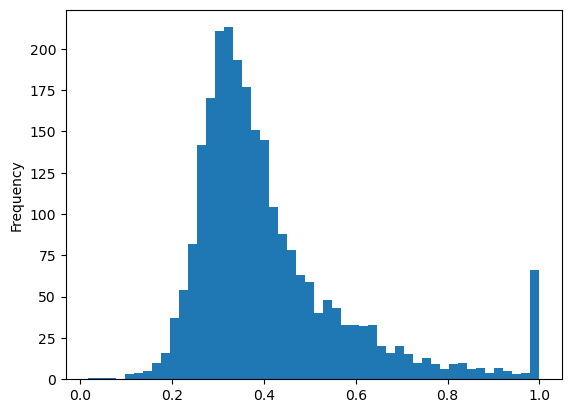

In [21]:
df.phonetic_ev.plot.hist(bins=50)

In [22]:
df[['transcription', 'recognized', 'phonetic_ev', 'new_path', 'lang']].to_csv("evaluated.csv")